<a href="https://colab.research.google.com/github/vbhaktha13/ML/blob/main/NN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [3]:
pip install sklearn

In [4]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X,y = make_blobs(n_samples=200,centers=2,n_features=2,random_state=1)
scalar=MinMaxScaler()
scalar.fit(X)
X=scalar.transform(X)

In [6]:
#train test split
X_train,y_train = X[:160],y[:160]  #split 160:40
X_test,y_test=X[160:],y[160:]

<function matplotlib.pyplot.show>

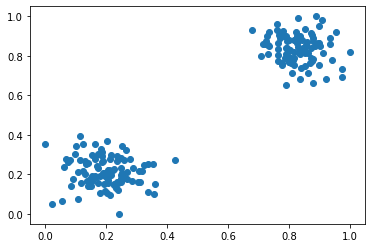

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.show

In [9]:
model=Sequential()
model.add(Dense(4,input_dim=2,activation='linear'))
model.add(Dense(4,activation='linear'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [11]:
#print initial weights
weights=model.layers[0].get_weights()
w_init=weights[0]
b_init=weights[1]
print("Logistic regression model is initialized with weights-{} and biases-{}".format(w_init,b_init))

Logistic regression model is initialized with weights-[[ 0.12561822  0.0159893   0.0852654  -0.8623359 ]
 [ 0.56704307 -0.3744068   0.10159159  0.18577671]] and biases-[0. 0. 0. 0.]


In [12]:
history=model.fit(X_train,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 151ms/step - loss: 0.6502 - accuracy: 0.4688 - val_loss: 0.6249 - val_accuracy: 0.5938
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6467 - accuracy: 0.4688 - val_loss: 0.6209 - val_accuracy: 0.6250
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6432 - accuracy: 0.4766 - val_loss: 0.6172 - val_accuracy: 0.6562
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6399 - accuracy: 0.4766 - val_loss: 0.6133 - val_accuracy: 0.6562
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6365 - accuracy: 0.4844 - val_loss: 0.6095 - val_accuracy: 0.6562
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6330 - accuracy: 0.4844 - val_loss: 0.6056 - val_accuracy: 0.6562
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6295 - accuracy: 0.4922 - val_loss: 0.6016 - val_accuracy: 0.6562
Epoch 8/100
4/4 [=====

In [18]:
model.predict(X_test) #probablities, u can put a threshold >0.5

array([[0.8997978 ],
       [0.05390739],
       [0.9324404 ],
       [0.9414646 ],
       [0.08124372],
       [0.04625663],
       [0.89307845],
       [0.8193536 ],
       [0.03728271],
       [0.04704931],
       [0.94937396],
       [0.07263708],
       [0.08851787],
       [0.02736652],
       [0.06200972],
       [0.91309243],
       [0.05709085],
       [0.07262382],
       [0.04314196],
       [0.8591121 ],
       [0.03912717],
       [0.9241599 ],
       [0.05996692],
       [0.04141435],
       [0.04288262],
       [0.86138976],
       [0.89207965],
       [0.8481931 ],
       [0.9065064 ],
       [0.04146978],
       [0.9285557 ],
       [0.91423035],
       [0.05659592],
       [0.8726784 ],
       [0.8645166 ],
       [0.8694118 ],
       [0.05002785],
       [0.06438842],
       [0.91572016],
       [0.03495604]], dtype=float32)

In [22]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score,accuracy_score

In [25]:
accuracy_score(y_test, model.predict(X_test)>0.5)

1.0

In [17]:
#Evaluate the Model
print('\ntesting----------')
cost=model.evaluate(X_test,y_test,batch_size=40)
print('testcost:',cost)
weights=model.layers[0].get_weights()
W=weights[0]
b=weights[1]
print('weights=', W,  '\nbiases=',b)


testing----------
1/1 [==============================] - 0s 111ms/step - loss: 0.0819 - accuracy: 1.0000
testcost: [0.08188315480947495, 1.0]
weights= [[ 0.45667544 -0.42294636  0.3897121  -1.2686338 ]
 [ 0.88899523 -0.8018515   0.3973217  -0.20924751]] 
biases= [-0.38613367  0.4705492  -0.36680505  0.4470497 ]
